# Code your own neuron and neural net
The parts of code that look like
```python
pass  # ⬅️✏️
```
need to be filled in before moving to the next cell.

Check out the slides and / or corresponding video lecture for more instructions.

In [3]:
# Define two vectors (lists): input my_x, weights my_w
my_x = [0, 1, 1]
my_w = [-10, 10, 5]

In [4]:
# Multiply two lists element wise
def mul(a, b):
    """
    return a list c, same length as a, element c[i] = a[i] * b[i]
    "len(list)" and "[0] * n" may be useful
    """
    if len(a) != len(b):
        raise ValueError("dimension mismatch")
    n = len(a)
    c = [0] * n  
    for i in range(n):
        c[i] = a[i] * b[i]
    
    return c

---

In [5]:
# Test mul() function
mul(my_x, my_w)

[0, 10, 5]

In [6]:
# Define a scalar: bias b
my_b = -5

In [9]:
# Neuron linear (internal) potential
def linear_neuron(x, weights, bias):
    """
    return a scalar value representing a scalar neuron
    "sum(list)" computes the sum of the elements in a list
    """
    return sum(mul(x,weights)) + bias

---

In [10]:
# Test linear_neuron() function
linear_neuron(my_x, my_w, my_b)

10

In [11]:
# Import exp() function (safe on lists)
from numpy import exp

In [12]:
# Logistic sigmoid
def sigmoid(z):
    """
    return the logistic sigmoid (use exp())
    """
    return exp(z)/(1+exp(z))

---

In [13]:
# Try out σ() for different z values
for z in (-5, 0, 5): print(sigmoid(z))

0.006692850924284856
0.5
0.9933071490757152


In [14]:
# Import some plotting stuff to graph sigmoid()
from numpy import linspace
from matplotlib.pyplot import plot, axhline, axvline, grid, style
style.use('dark_background')

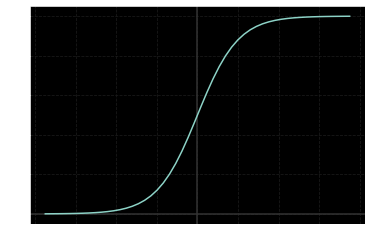

In [15]:
# Get a pair of axis and grid lines centred in (0, 0)
axhline(c='.2'); axvline(color='.2')
grid(c='.1', ls='--')

# Plot across a span of numbers
z = linspace(-7.5, 7.5)
plot(z, sigmoid(z));

In [16]:
# Full neuron function
def neuron(x, weights, bias):
    """
    Return a classical neuron output (reuse code above)
    """
    return sigmoid(linear_neuron(x, weights, bias))

---

In [17]:
# Test neuron() function
neuron(my_x, my_w, my_b)

0.9999546021312976

In [26]:
# Package OR neuron weights and bias
def or_neuron(x):
    """
    Return x1 OR x2 (x1 + x2)
    """
    return x[0] or x[1]

---

In [27]:
# Defina a collection of inputs to test OR and AND
my_x_collection = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]

In [28]:
print('Checking OR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{or_neuron(my_x):.3f}')

Checking OR neuron output
[0, 0] 0.000
[0, 1] 1.000
[1, 0] 1.000
[1, 1] 1.000


In [29]:
# Package AND neuron weights and bias
def and_neuron(x):
    """
    Return x1 AND x2 (x1 * x2)
    """
    return x[0] and x[1]

---

In [30]:
print('Checking AND neuron output')
for my_x in my_x_collection:
    print(my_x, f'{and_neuron(my_x):.3f}')

Checking AND neuron output
[0, 0] 0.000
[0, 1] 0.000
[1, 0] 0.000
[1, 1] 1.000


In [38]:
# Package NOT neuron weight and bias
def not_neuron(x):
    """
    Return NOT x1 (x1_)
    """
    return ( x[0] + 1 ) % 2

---

In [39]:
print('Checking NOT neuron output')
for my_x in [[0], [1]]:
    print(my_x, f'{not_neuron(my_x):.3f}')

Checking NOT neuron output
[0] 1.000
[1] 0.000


![X-OR](res/x-or_circuit.png)

In [44]:
# Combine OR, AND, and NOT into a XOR neuron
def xor_neuron(x):
    """
    Return x1_ * x2 + x1 * x2_
    """
    x1 = x[0]
    x2 = x[1]
    x1_ = not_neuron([x[0]])
    x2_ = not_neuron([x[1]])
    x1_x2 = and_neuron([x1_, x2])
    x1x2_ = and_neuron([x1, x2_])
    return or_neuron([x1_x2, x1x2_])

---

In [45]:
print('Checking XOR neuron output')
for my_x in my_x_collection:
    print(my_x, f'{xor_neuron(my_x):.3f}')

Checking XOR neuron output
[0, 0] 0.000
[0, 1] 1.000
[1, 0] 1.000
[1, 1] 0.000


![Half-adder](res/half-adder_circuit.png)

In [75]:
# Combine a XOR and an AND into a half-adder
def half_adder_neuron(x):
    return xor_neuron(x), and_neuron(x)

In [76]:
print('Checking XOR neuron output')
print("my_x\tS\tC_out")
for my_x in my_x_collection:
    S, C_out = half_adder_neuron(my_x)
    print("{}\t{}\t{}".format(my_x, S, C_out))

Checking XOR neuron output
my_x	S	C_out
[0, 0]	0	0
[0, 1]	1	0
[1, 0]	1	0
[1, 1]	0	1


---

![Adder](res/adder_circuit.png)

In [88]:
# Combine XOR, AND, and OR into a (full) adder
def full_adder_neuron_circuit(x, carry):
    # S = xor(xor(A,B),C_in)
    xorAB = xor_neuron(x)
    S = xor_neuron([xorAB, carry])
    
    # C_out = or(and(A,B),and(xor(A,B),C_in))
    andAB = and_neuron(x)
    andABC = and_neuron([xorAB, carry])
    C_out = or_neuron([andAB, andABC])
    
    return S, C_out

In [92]:
#define a list of possible values for the carry, C_in
my_carry_collection = [0,1]
print("Checking full adder neuron:")
print("my_x\tmy_carry\t:\tC_out\tS")
for my_x in my_x_collection:
    for my_carry in my_carry_collection:
        S, C_out = full_adder_neuron_circuit(my_x, my_carry)
        print("{}\t{}\t\t:\t{}\t{}".format(my_x,my_carry, C_out, S))

Checking full adder neuron:
my_x	my_carry	:	C_out	S
[0, 0]	0		:	0	0
[0, 0]	1		:	0	1
[0, 1]	0		:	0	1
[0, 1]	1		:	1	0
[1, 0]	0		:	0	1
[1, 0]	1		:	1	0
[1, 1]	0		:	1	0
[1, 1]	1		:	1	1


In [90]:
# Combine two half-adders and an OR into a (full) adder
def full_adder_neuron(x, carry):
    S1, C_out1 = half_adder_neuron(x)
    S2, C_out2 = half_adder_neuron([S1, carry])
    
    return S2, or_neuron([C_out1, C_out2])

In [91]:
#define a list of possible values for the carry, C_in
my_carry_collection = [0,1]
print("Checking full adder neuron:")
print("my_x\tmy_carry\t:\tC_out\tS")
for my_x in my_x_collection:
    for my_carry in my_carry_collection:
        S, C_out = full_adder_neuron_circuit(my_x, my_carry)
        print("{}\t{}\t\t:\t{}\t{}".format(my_x,my_carry, C_out, S))

Checking half-adder neuron:
my_x	my_carry	:	C_out	S
[0, 0]	0		:	0	0
[0, 0]	1		:	0	1
[0, 1]	0		:	0	1
[0, 1]	1		:	1	0
[1, 0]	0		:	0	1
[1, 0]	1		:	1	0
[1, 1]	0		:	1	0
[1, 1]	1		:	1	1
